<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/27_RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation System

The code Resources:

[https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699
](https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699)

[https://github.com/TannerGilbert/Articles](https://github.com/TannerGilbert/Articles)

[https://www.kaggle.com/zygmunt/goodbooks-10k](https://www.kaggle.com/zygmunt/goodbooks-10k)


The input features:

        -book_id
        -user_id
        -rating

In [1]:
!git clone https://github.com/z-arabi/SRU-deeplearning-workshop.git
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 380, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 380 (delta 25), reused 25 (delta 14), pack-reused 332
Receiving objects: 100% (380/380), 118.64 MiB | 28.65 MiB/s, done.
Resolving deltas: 100% (176/176), done.
Updating files: 100% (56/56), done.
/content/SRU-deeplearning-workshop


In [2]:
!unzip dataset/goodbook.zip

Archive:  dataset/goodbook.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [3]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model


In [4]:
dataset = pd.read_csv('ratings.csv')

In [5]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
# number of all ratings
dataset.shape

(981756, 3)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [8]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [9]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [10]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [11]:
n_books = len(dataset.book_id.unique())
n_books

10000

Model Architecture:  
We have to use Functional API becuase for the Dot layer we need multiple inputs.

    -Input: Input for both books and users
    -Embedding Layers: Embeddings for books and users
    -Dot: combines embeddings using a dot product

In [12]:
# shape is the features of input > #users*1 > one hot and binary (0-1)
# We have None for the number of samples in the summary for all different types of network
# in Dens layer we have input_dim=10 (the dimension of the input because we flatten all the features)
# in Conv layer we have input_shape=(15,15,3) [the size and the channels of the each input image]
# in Input layer we have shape >> (1,) OR [1]
# book_input is a number and it is book_id
book_input = Input(shape=[1], name="Book-Input")
# input(#users + bias) and output > (1,5)
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
# Faltten: (5,)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# user_id as input
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# axis=1 > not number of samples > number of features
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [13]:
# None: number of samples
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Book-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Book-Embedding (Embedding)  (None, 1, 5)                 50005     ['Book-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 267125    ['User-Input[0][0]']          
                                                                                              

In [14]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 15s 2ms/step - loss: 15.8283


15.828276634216309

In [17]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])
# we have 10 users and 10 books we predict what score each person would give to the book corresponding to themselves

for i in range(0,10):
   print(predictions[i], test.rating.iloc[i])

1/1 [==============================] - 0s 22ms/step
[0.00049214] 5
[-0.00042164] 4
[0.00048164] 3
[-0.00584427] 5
[0.00021528] 3
[-0.00124887] 3
[0.00133415] 3
[0.00107351] 4
[0.01422122] 3
[0.00139418] 5


Epoch 1/10
24544/24544 [==============================] - 84s 3ms/step - loss: 13.4015
Epoch 2/10
24544/24544 [==============================] - 81s 3ms/step - loss: 4.1791
Epoch 3/10
24544/24544 [==============================] - 81s 3ms/step - loss: 1.7243
Epoch 4/10
24544/24544 [==============================] - 82s 3ms/step - loss: 1.1768
Epoch 5/10
24544/24544 [==============================] - 83s 3ms/step - loss: 0.9534
Epoch 6/10
24544/24544 [==============================] - 83s 3ms/step - loss: 0.8377
Epoch 7/10
24544/24544 [==============================] - 80s 3ms/step - loss: 0.7688
Epoch 8/10
24544/24544 [==============================] - 83s 3ms/step - loss: 0.7255
Epoch 9/10
24544/24544 [==============================] - 82s 3ms/step - loss: 0.6970
Epoch 10/10
24544/24544 [==============================] - 82s 3ms/step - loss: 0.6763


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


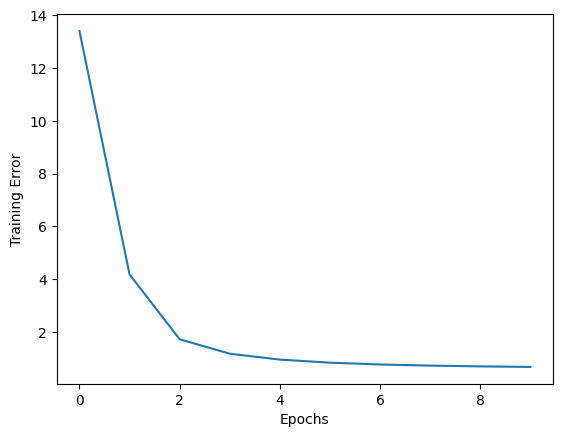

In [18]:
from keras.models import load_model
import os
import matplotlib.pyplot as plt

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 12s 2ms/step - loss: 0.9307


0.9307172894477844

In [23]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 88ms/step
[5.078111] 5
[4.095413] 4
[3.3916054] 3
[4.011222] 5
[3.2399259] 3
[3.9286294] 3
[4.197623] 3
[4.5429063] 4
[4.000377] 3
[4.1785765] 5


[None, None, None, None, None, None, None, None, None, None]

# Visualizing

In [26]:
# when you give the name to the layers, you can get them in sequence
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()
len(book_em_weights[0])

10001

In [27]:
book_em_weights = book_em_weights[0]
book_em_weights[:5]

array([[-0.04413697,  0.02511266, -0.01525251, -0.02650833,  0.03177134],
       [ 1.6937485 ,  1.2431682 ,  1.6943169 , -1.6497781 ,  1.6817266 ],
       [ 1.689499  ,  0.83873177,  2.0238776 , -1.6509794 ,  1.3453102 ],
       [ 1.4218855 ,  0.4399201 ,  0.83332115, -0.8743057 ,  2.084928  ],
       [ 1.7225039 ,  0.89417386,  2.060261  , -1.9593897 ,  0.7414405 ]],
      dtype=float32)

<Axes: >

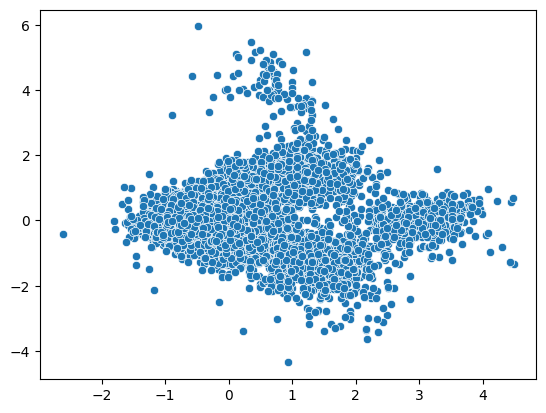

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

t-SNE (t-distributed Stochastic Neighbor Embedding) and PCA (Principal Component Analysis) are both dimensionality reduction techniques, but they have significant differences in terms of how they work and what types of data they are best suited for:

1. **Linearity vs. Non-Linearity:**
   - PCA is a linear technique that seeks to find orthogonal linear combinations of the original features that explain the most variance in the data. It focuses on capturing global patterns and directions of maximum variance.
   - t-SNE is a non-linear technique that aims to preserve local structures and relationships in the data. It is particularly effective at capturing complex, non-linear relationships and maintaining the distances between data points in the lower-dimensional space.

2. **Preservation of Variance:**
   - PCA maximizes the variance along the principal components, which means it tends to preserve the global structure of the data.
   - t-SNE does not explicitly preserve variance. Instead, it focuses on preserving pairwise similarities or distances between data points, with an emphasis on preserving local structure and clustering patterns.

3. **Sensitivity to Noise:**
   - PCA can be sensitive to noise in the data because it aims to capture all variance, including noise.
   - t-SNE is more robust to noise because it focuses on preserving local relationships and is less influenced by global noise.

4. **Interpretability:**
   - PCA provides interpretable results in terms of the principal components, which are linear combinations of the original features.
   - t-SNE does not provide directly interpretable components, and the transformed features have no clear meaning. It is primarily used for visualization and exploration rather than feature engineering.

5. **Computation and Scalability:**
   - PCA is computationally efficient and can handle large datasets with many features.
   - t-SNE is more computationally intensive, especially for high-dimensional data, and may not be suitable for extremely large datasets.

6. **Use Cases:**
   - PCA is often used for tasks like dimensionality reduction, noise reduction, and feature engineering. It is especially useful when you want to reduce the dimensionality of data while preserving most of the variance or when you need interpretable components.
   - t-SNE is commonly used for visualizing high-dimensional data in a lower-dimensional space, exploring local structures, and identifying clusters or groups within the data. It is valuable for data exploration and understanding complex relationships.

In summary, the choice between PCA and t-SNE depends on your specific goals and the nature of your data. If you need a quick and interpretable reduction of dimensionality while preserving global structure, PCA may be more suitable. If you want to visualize complex relationships and preserve local structures, especially in non-linear data, t-SNE is a better choice. Often, they can also complement each other in data analysis workflows.

<Axes: >

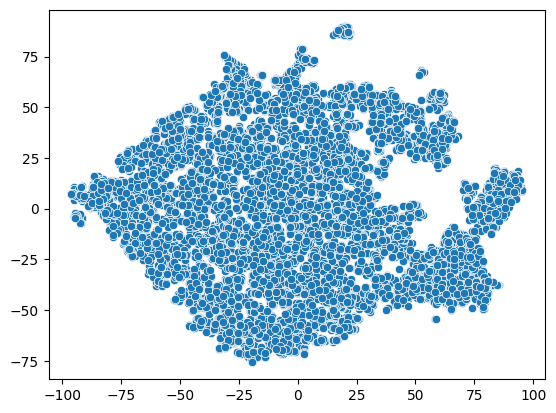

In [29]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(book_em_weights)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1])

# Book Clustering

In [30]:
from sklearn.cluster import KMeans

In [31]:
# Choose the number of clusters (K) - replace this with an appropriate value
K = 5

# Create a K-means model and fit it to the data
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(book_em_weights)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
print(cluster_labels.shape)
print(np.unique(cluster_labels))

(10001,)
[0 1 2 3 4]


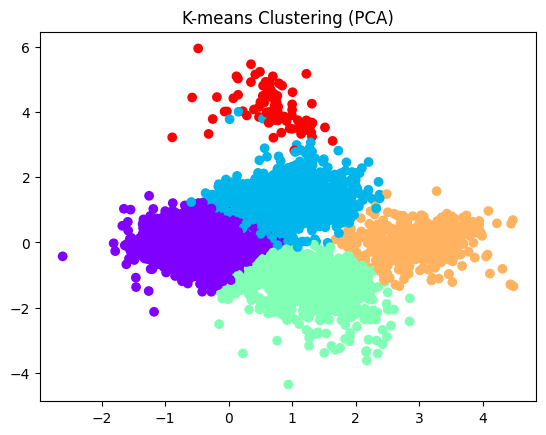

In [38]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("K-means Clustering (PCA)")
plt.show()

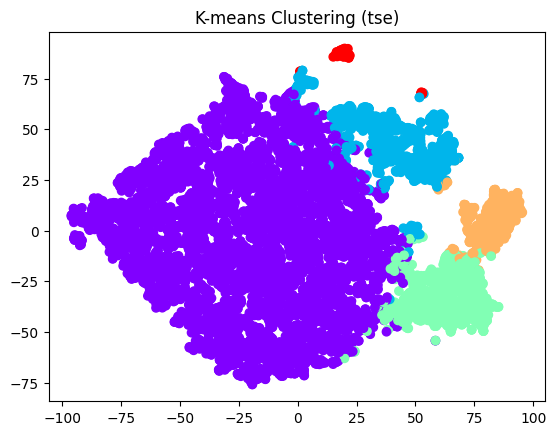

In [40]:
# Create a scatter plot to visualize the clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("K-means Clustering (tse)")
plt.show()